<a href="https://colab.research.google.com/github/TANKIANAUN/Machine-Learning/blob/master/Keras_sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json

from matplotlib import pyplot as plt

import numpy as np

In [ ]:

def function(x):
    return 10*x**2 - 5*x - 0.5

In [ ]:

x_train = np.random.rand(10000)
y_train = function(x_train)

x_test = np.linspace(0, 1, 100)
y_test = function(x_test)

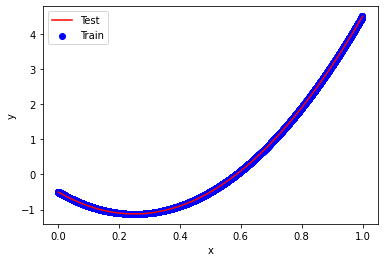

In [ ]:
plt.scatter(x_train, y_train, label='Train', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=20))
model.add(Activation('relu'))
model.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer=Adam())
history = model.fit(x_train, y_train, batch_size=50, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.2943 - val_loss: 0.1156
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.0149
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0073
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 9.7201e-04
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 4.9235e-04 - val_loss: 3.6608e-04
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 2.1220e-04 - val_loss: 1.9452e-04
Epoch 8/10
200/200 [==============================] - 0s 2ms/step - loss: 1.1491e-04 - val_loss: 1.0736e-04
Epoch 9/10
200/200 [==============================] - 0s 2ms/step - loss: 7.4829e-05 - val_loss: 9.0069e-05
Epoch 10/10
200/200 [==============================] - 0s 2ms/st

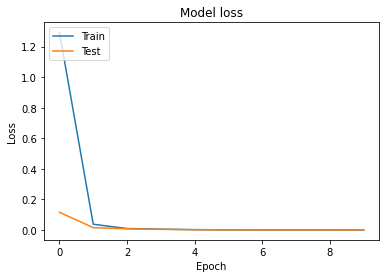

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

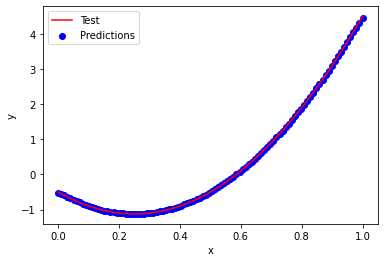

In [ ]:
y_predictions = model.predict(x_test)
plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()


In [ ]:
model_structure = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights.h5")

In [ ]:
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
restored_model = model_from_json(loaded_model_json)
restored_model.load_weights("weights.h5")

In [ ]:

y_predictions = restored_model.predict(x_test, batch_size=1)

plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()